# Visualizing hyperparameter optimization results

In this notebook we load a CSV file containing all the hyperparmeter trials that we ran on BioKG for TransE, ComplEx, and RotatE. The goal is to generate box plots that aggregate performance over different hyperparameters.

In [54]:
from collections import OrderedDict
import os.path as osp

import matplotlib.pyplot as plt
import pandas as pd

In [55]:
file = 'wandb_export_2023-04-17T13_46_36.739+02_00.csv'
file_base_name = osp.splitext(file)[0]
hparam_results = pd.read_csv(osp.join('..', 'data', 'wandb-data', file))

In [3]:
hparam_results

,Name,cli_model,both.realistic.inverse_harmonic_mean_rank,both.realistic.hits_at_1,both.realistic.hits_at_3,both.realistic.hits_at_10
0,jolly-sweep-14,rotate,0.558607,0.456713,0.620239,0.747777
1,golden-sweep-12,rotate,0.556687,0.455096,0.618320,0.745380
2,major-sweep-21,rotate,0.545702,0.432796,0.618303,0.748789
3,sparkling-sweep-8,rotate,0.541366,0.444360,0.595575,0.726160
4,radiant-sweep-27,rotate,0.534158,0.409398,0.618671,0.753602
...,...,...,...,...,...,...
140,vibrant-sweep-5,complex,0.000386,0.000192,0.000354,0.000513
141,vibrant-sweep-14,complex,0.000086,0.000011,0.000019,0.000057
142,crisp-sweep-7,complex,0.000075,0.000005,0.000013,0.000049
143,worthy-sweep-2,complex,0.000067,0.000000,0.000011,0.000016


In [32]:
# Configure matplotlib fonts to use Helvetica Neue
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica Neue'

In [33]:
def get_results_for_model(model_name):
    return hparam_results[hparam_results['cli_model'] == model_name]

transe_results = get_results_for_model('transe')
complex_results = get_results_for_model('complex')
rotate_results = get_results_for_model('rotate')

model_results = OrderedDict([
    ('TransE', transe_results),
    ('ComplEx', complex_results),
    ('RotatE', rotate_results)
])

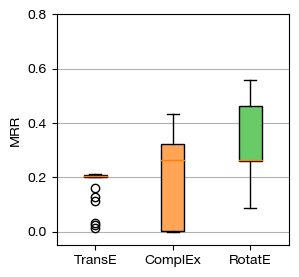

In [72]:
def plot_results(model_results, metric, metric_label):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.set_ylabel(metric_label)
    # Plot boxplots, filled with different colors for each model
    bplot = ax.boxplot([model_results[model][metric] for model in model_results.keys()], labels=model_results.keys(), patch_artist=True)
    for patch, color in zip(bplot['boxes'], ['#5ba5d9', '#ffa555', '#68cb68']):
        # Set alpha to 0.5 to make the boxes transparent
        patch.set_facecolor(color)
    ax.set_xticklabels(model_results.keys())
    # Add a grid
    ax.yaxis.grid(True)
    ax.set_ylim(-0.05, 0.8)
    plt.show()
    fig.savefig(f'{file_base_name}_{metric}.pdf', bbox_inches='tight')

plot_results(model_results, 'both.realistic.inverse_harmonic_mean_rank', 'MRR')

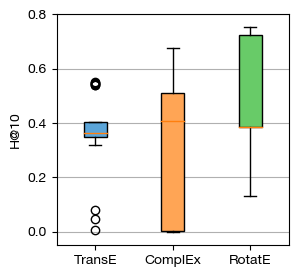

In [73]:
plot_results(model_results, 'both.realistic.hits_at_10', 'H@10')